In [ ]:
%pip install -U yfinance==0.2.9 numpy==1.20.3 numexpr==2.7.3
%pip install pandas
%pip install yfinance
%pip install --upgrade pandas-datareader
%pip install pyopenssl
%pip install openssl
%pip update -n base -c defaults conda

In [ ]:
pip install --upgrade pip

In [9]:

import yfinance as yf
yf.pdr_override()
import pandas_datareader as pdr

In [10]:
STOCK_NAME = "AMZN"

In [11]:
# Challenge
from datetime import datetime
START_DATE = datetime(2011, 3, 1) 
END_DATE = datetime(2021, 3, 1) 

In [12]:
import pandas as pd
df = pdr.data.DataReader(
    'AMZN', 
    start=START_DATE, 
    end=END_DATE
)

# df = pdr.data.DataReader(name=STOCK_NAME, start=START_DATE, end=END_DATE)

[*********************100%***********************]  1 of 1 completed


In [13]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-03-01,8.6765,8.6980,8.4335,8.4720,8.4720,116942000
2011-03-02,8.4545,8.6650,8.4175,8.6010,8.6010,103714000
2011-03-03,8.6855,8.7230,8.6025,8.6395,8.6395,82764000
2011-03-04,8.6310,8.6375,8.4755,8.5835,8.5835,98486000
2011-03-07,8.5960,8.6045,8.3120,8.4540,8.4540,118658000


Note: you may need to restart the kernel to use updated packages.


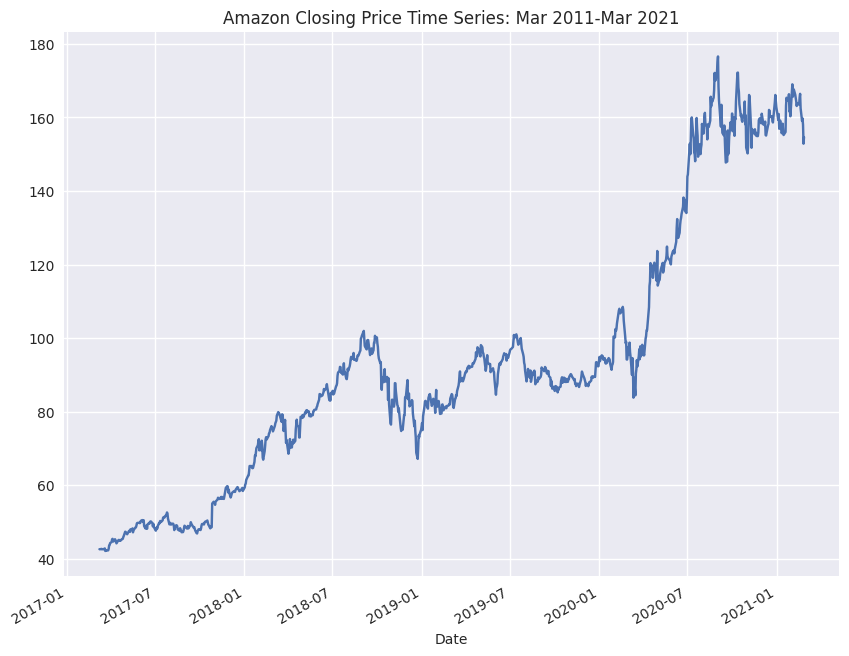

In [14]:
%pip install matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
with plt.style.context('seaborn'):
    df.tail(1000)['Close'].plot(figsize=(10,8))
    plt.title('Amazon Closing Price Time Series: Mar 2011-Mar 2021')

In [15]:
# Feature engineering 
def daily_change(row): 
    return row.pct_change()

In [16]:
import numpy as np
def daily_log_change_shift(row):
    return np.log(row) - np.log(row.shift(1)) - 1

In [25]:
df['daily_returns'] = df[['Close']].apply(lambda x: daily_change(x))

In [17]:
# Challenge
df['log_daily_returns'] = df[['Close']].apply(lambda x: daily_log_change_shift(x)) # this must be filled by student

In [18]:
# volaitility index
df['volatility_index'] = (df['High'] - df['Low']) / df['Close'] * 100.0

In [19]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,log_daily_returns,volatility_index
Date,,,,,,,,
2011-03-01,8.6765,8.6980,8.4335,8.4720,8.4720,116942000,NaN,3.122045
2011-03-02,8.4545,8.6650,8.4175,8.6010,8.6010,103714000,-0.984888,2.877577
2011-03-03,8.6855,8.7230,8.6025,8.6395,8.6395,82764000,-0.995534,1.394752
2011-03-04,8.6310,8.6375,8.4755,8.5835,8.5835,98486000,-1.006503,1.887339
2011-03-07,8.5960,8.6045,8.3120,8.4540,8.4540,118658000,-1.015202,3.459895


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2011-03-01 to 2021-02-26
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               2516 non-null   float64
 1   High               2516 non-null   float64
 2   Low                2516 non-null   float64
 3   Close              2516 non-null   float64
 4   Adj Close          2516 non-null   float64
 5   Volume             2516 non-null   int64  
 6   log_daily_returns  2515 non-null   float64
 7   volatility_index   2516 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 176.9 KB


In [21]:
%pip install scikit-learn 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
iter = IterativeImputer()
df_scaled = iter.fit_transform(df)
imputed_data_df = pd.DataFrame(df_scaled, columns = list(df))

In [24]:
from sklearn.preprocessing import StandardScaler
X_unscaled = imputed_data_df.drop(['Adj Close', 'Close'], axis=1)

In [27]:
scaler = StandardScaler()
x = scaler. fit_transform(X_unscaled)
X_scaled = pd.DataFrame(x, columns=list(X_unscaled))

In [28]:
X_scaled.head()

,Open,High,Low,Volume,log_daily_returns,volatility_index
0,-0.930850,-0.931587,-0.935569,0.672168,-0.140977,0.694136
1,-0.935987,-0.932342,-0.935944,0.390529,0.704917,0.500732
2,-0.930642,-0.931015,-0.931605,-0.055520,0.167289,-0.672363
3,-0.931903,-0.932971,-0.934584,0.279219,-0.386678,-0.282667
4,-0.932713,-0.933726,-0.938419,0.708703,-0.826000,0.961417


In [29]:
y = imputed_data_df['Adj Close']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.1, shuffle=False)

In [31]:
# Linear Regression
from sklearn.linear_model import LinearRegression

In [37]:
# %pip install --upgrade scikit-learn
from sklearn.preprocessing import normalize
lr = LinearRegression()
lr.fit(X_train, y_train)

# import sklearn
# print(sklearn.__version__)


LinearRegression()

In [38]:
est_coef_df = pd.DataFrame([elem for elem in lr.coef_], columns = ['estimated_beta'])
est_coef_df.index = list(X_train)
est_coef_df

,estimated_beta
Open,-23.013054
High,35.547788
Low,30.664324
Volume,-0.017241
log_daily_returns,0.101356
volatility_index,0.011020


In [39]:
lr.score(X_test, y_test)

0.9978727186452113

In [40]:
y_pred_lr = lr.predict(X_test)

In [41]:
# Step 2
from sklearn.metrics import mean_squared_error
rmse_lr = mean_squared_error(y_test, y_pred_lr)# this must be filled by student
print(f"RMSE Linear Regression: {round(rmse_lr, 4)}")

RMSE Linear Regression: 1.2129


In [42]:
test_pred_df_lr = pd.DataFrame()
test_pred_df_lr['Date'] = df.iloc[-len(X_test):].index
test_pred_df_lr['y_pred_LR'] = y_pred_lr
test_pred_df_lr.set_index('Date', inplace=True)

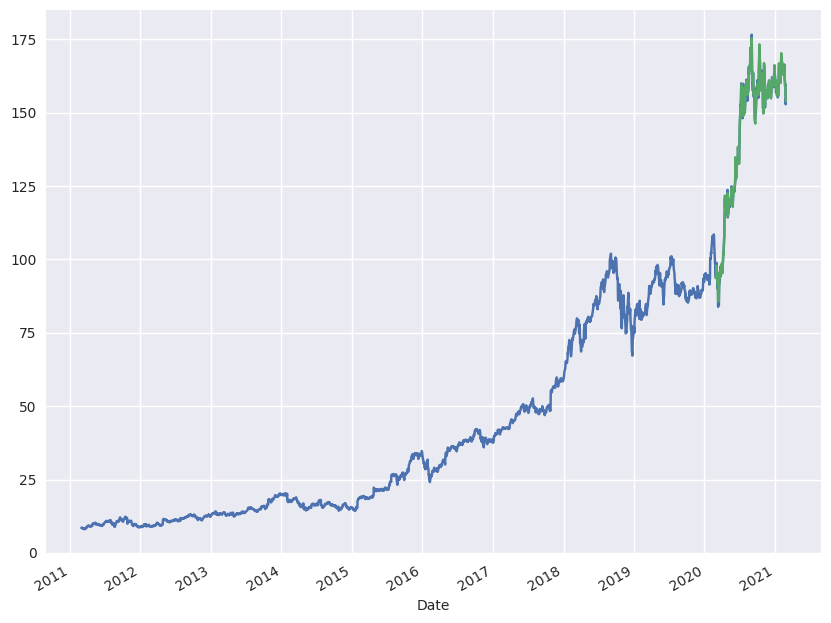

In [43]:
import matplotlib.pyplot as plt
with plt.style.context('seaborn'):
    df.tail(imputed_data_df.shape[0])['Close'].plot(figsize=(10,8))
    test_pred_df_lr['y_pred_LR'].plot(figsize=(10,8))

In [44]:
# Ridge Regression
from sklearn.linear_model import Ridge

In [46]:
# Challenge
# this must be filled by student
# ridge_reg = Ridge(normalize=True, alpha=0.5, random_state=42, max_iter=1000)
ridge_reg = Ridge(alpha=0.5, random_state=42, max_iter=1000)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

In [47]:
from sklearn.metrics import mean_squared_error
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))# this must be filled by student
print(f"RMSE Ridge Regression: {round(rmse_ridge, 4)}")

RMSE Ridge Regression: 1.4106


In [48]:
ridge_reg.score(X_test, y_test)

0.9965100976510226

In [49]:
test_pred_df_ridge = pd.DataFrame()
test_pred_df_ridge['Date'] = df.iloc[-len(X_test):].index
test_pred_df_ridge['y_pred_Ridge'] = y_pred_ridge
test_pred_df_ridge.set_index('Date', inplace=True)

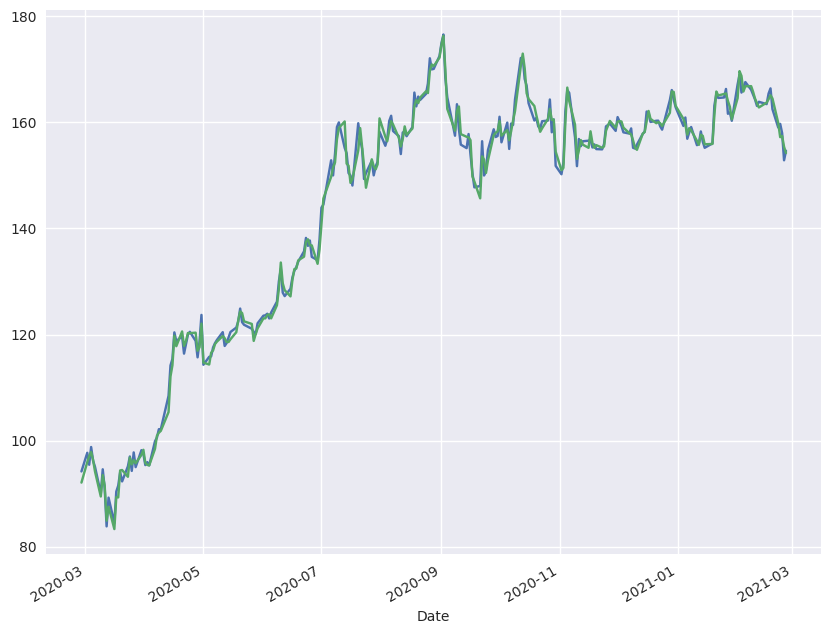

In [50]:
import matplotlib.pyplot as plt
with plt.style.context('seaborn'):
    df.tail(test_pred_df_ridge.shape[0])['Close'].plot(figsize=(10,8))
    test_pred_df_ridge['y_pred_Ridge'].plot(figsize=(10,8))

In [53]:
# Grid Search Cross Validation
from sklearn.model_selection import GridSearchCV
grid_params = {
    'alpha': [0.005, 0.1, 0.5, 1, 5]
}
cv = GridSearchCV(ridge_reg, grid_params, cv=5)
cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(alpha=0.5, max_iter=1000, random_state=42),
             param_grid={'alpha': [0.005, 0.1, 0.5, 1, 5]})

In [54]:
best_model = cv.best_estimator_
best_params = cv.best_params_
y_pred_ridge_cv = best_model.predict(X_test)
rmse_ridge_cv = np.sqrt(mean_squared_error(y_test, y_pred_ridge_cv))

In [56]:
print(f"Best Ridge RMSE: {round(rmse_ridge_cv,4)}")

Best Ridge RMSE: 1.097


In [57]:
best_model.score(X_train, y_train)

0.9999196868528064

In [58]:
test_pred_df_ridge_cv = pd.DataFrame()
test_pred_df_ridge_cv['Date'] = df.iloc[-len(X_test):].index
test_pred_df_ridge_cv['y_pred_Ridge_best'] = y_pred_ridge_cv
test_pred_df_ridge_cv.set_index('Date', inplace=True)

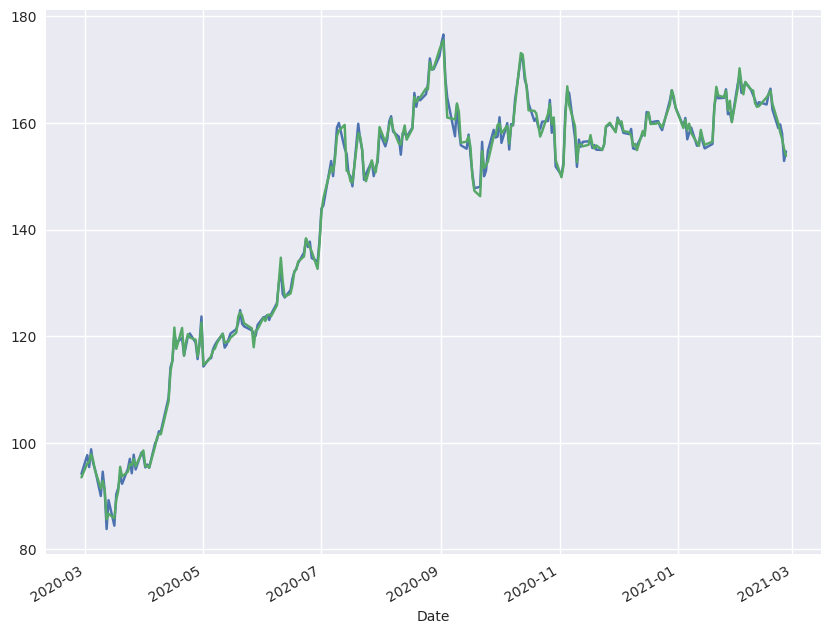

In [59]:
import matplotlib.pyplot as plt
with plt.style.context('seaborn'):
    df.tail(test_pred_df_ridge_cv.shape[0])['Close'].plot(figsize=(10,8))
    test_pred_df_ridge_cv['y_pred_Ridge_best'].plot(figsize=(10,8))

ConversionError: Failed to convert value(s) to axis units: array([Timestamp('2020-02-28 00:00:00'), Timestamp('2020-03-02 00:00:00'),
       Timestamp('2020-03-03 00:00:00'), Timestamp('2020-03-04 00:00:00'),
       Timestamp('2020-03-05 00:00:00'), Timestamp('2020-03-06 00:00:00'),
       Timestamp('2020-03-09 00:00:00'), Timestamp('2020-03-10 00:00:00'),
       Timestamp('2020-03-11 00:00:00'), Timestamp('2020-03-12 00:00:00'),
       Timestamp('2020-03-13 00:00:00'), Timestamp('2020-03-16 00:00:00'),
       Timestamp('2020-03-17 00:00:00'), Timestamp('2020-03-18 00:00:00'),
       Timestamp('2020-03-19 00:00:00'), Timestamp('2020-03-20 00:00:00'),
       Timestamp('2020-03-23 00:00:00'), Timestamp('2020-03-24 00:00:00'),
       Timestamp('2020-03-25 00:00:00'), Timestamp('2020-03-26 00:00:00'),
       Timestamp('2020-03-27 00:00:00'), Timestamp('2020-03-30 00:00:00'),
       Timestamp('2020-03-31 00:00:00'), Timestamp('2020-04-01 00:00:00'),
       Timestamp('2020-04-02 00:00:00'), Timestamp('2020-04-03 00:00:00'),
       Timestamp('2020-04-06 00:00:00'), Timestamp('2020-04-07 00:00:00'),
       Timestamp('2020-04-08 00:00:00'), Timestamp('2020-04-09 00:00:00'),
       Timestamp('2020-04-13 00:00:00'), Timestamp('2020-04-14 00:00:00'),
       Timestamp('2020-04-15 00:00:00'), Timestamp('2020-04-16 00:00:00'),
       Timestamp('2020-04-17 00:00:00'), Timestamp('2020-04-20 00:00:00'),
       Timestamp('2020-04-21 00:00:00'), Timestamp('2020-04-22 00:00:00'),
       Timestamp('2020-04-23 00:00:00'), Timestamp('2020-04-24 00:00:00'),
       Timestamp('2020-04-27 00:00:00'), Timestamp('2020-04-28 00:00:00'),
       Timestamp('2020-04-29 00:00:00'), Timestamp('2020-04-30 00:00:00'),
       Timestamp('2020-05-01 00:00:00'), Timestamp('2020-05-04 00:00:00'),
       Timestamp('2020-05-05 00:00:00'), Timestamp('2020-05-06 00:00:00'),
       Timestamp('2020-05-07 00:00:00'), Timestamp('2020-05-08 00:00:00'),
       Timestamp('2020-05-11 00:00:00'), Timestamp('2020-05-12 00:00:00'),
       Timestamp('2020-05-13 00:00:00'), Timestamp('2020-05-14 00:00:00'),
       Timestamp('2020-05-15 00:00:00'), Timestamp('2020-05-18 00:00:00'),
       Timestamp('2020-05-19 00:00:00'), Timestamp('2020-05-20 00:00:00'),
       Timestamp('2020-05-21 00:00:00'), Timestamp('2020-05-22 00:00:00'),
       Timestamp('2020-05-26 00:00:00'), Timestamp('2020-05-27 00:00:00'),
       Timestamp('2020-05-28 00:00:00'), Timestamp('2020-05-29 00:00:00'),
       Timestamp('2020-06-01 00:00:00'), Timestamp('2020-06-02 00:00:00'),
       Timestamp('2020-06-03 00:00:00'), Timestamp('2020-06-04 00:00:00'),
       Timestamp('2020-06-05 00:00:00'), Timestamp('2020-06-08 00:00:00'),
       Timestamp('2020-06-09 00:00:00'), Timestamp('2020-06-10 00:00:00'),
       Timestamp('2020-06-11 00:00:00'), Timestamp('2020-06-12 00:00:00'),
       Timestamp('2020-06-15 00:00:00'), Timestamp('2020-06-16 00:00:00'),
       Timestamp('2020-06-17 00:00:00'), Timestamp('2020-06-18 00:00:00'),
       Timestamp('2020-06-19 00:00:00'), Timestamp('2020-06-22 00:00:00'),
       Timestamp('2020-06-23 00:00:00'), Timestamp('2020-06-24 00:00:00'),
       Timestamp('2020-06-25 00:00:00'), Timestamp('2020-06-26 00:00:00'),
       Timestamp('2020-06-29 00:00:00'), Timestamp('2020-06-30 00:00:00'),
       Timestamp('2020-07-01 00:00:00'), Timestamp('2020-07-02 00:00:00'),
       Timestamp('2020-07-06 00:00:00'), Timestamp('2020-07-07 00:00:00'),
       Timestamp('2020-07-08 00:00:00'), Timestamp('2020-07-09 00:00:00'),
       Timestamp('2020-07-10 00:00:00'), Timestamp('2020-07-13 00:00:00'),
       Timestamp('2020-07-14 00:00:00'), Timestamp('2020-07-15 00:00:00'),
       Timestamp('2020-07-16 00:00:00'), Timestamp('2020-07-17 00:00:00'),
       Timestamp('2020-07-20 00:00:00'), Timestamp('2020-07-21 00:00:00'),
       Timestamp('2020-07-22 00:00:00'), Timestamp('2020-07-23 00:00:00'),
       Timestamp('2020-07-24 00:00:00'), Timestamp('2020-07-27 00:00:00'),
       Timestamp('2020-07-28 00:00:00'), Timestamp('2020-07-29 00:00:00'),
       Timestamp('2020-07-30 00:00:00'), Timestamp('2020-07-31 00:00:00'),
       Timestamp('2020-08-03 00:00:00'), Timestamp('2020-08-04 00:00:00'),
       Timestamp('2020-08-05 00:00:00'), Timestamp('2020-08-06 00:00:00'),
       Timestamp('2020-08-07 00:00:00'), Timestamp('2020-08-10 00:00:00'),
       Timestamp('2020-08-11 00:00:00'), Timestamp('2020-08-12 00:00:00'),
       Timestamp('2020-08-13 00:00:00'), Timestamp('2020-08-14 00:00:00'),
       Timestamp('2020-08-17 00:00:00'), Timestamp('2020-08-18 00:00:00'),
       Timestamp('2020-08-19 00:00:00'), Timestamp('2020-08-20 00:00:00'),
       Timestamp('2020-08-21 00:00:00'), Timestamp('2020-08-24 00:00:00'),
       Timestamp('2020-08-25 00:00:00'), Timestamp('2020-08-26 00:00:00'),
       Timestamp('2020-08-27 00:00:00'), Timestamp('2020-08-28 00:00:00'),
       Timestamp('2020-08-31 00:00:00'), Timestamp('2020-09-01 00:00:00'),
       Timestamp('2020-09-02 00:00:00'), Timestamp('2020-09-03 00:00:00'),
       Timestamp('2020-09-04 00:00:00'), Timestamp('2020-09-08 00:00:00'),
       Timestamp('2020-09-09 00:00:00'), Timestamp('2020-09-10 00:00:00'),
       Timestamp('2020-09-11 00:00:00'), Timestamp('2020-09-14 00:00:00'),
       Timestamp('2020-09-15 00:00:00'), Timestamp('2020-09-16 00:00:00'),
       Timestamp('2020-09-17 00:00:00'), Timestamp('2020-09-18 00:00:00'),
       Timestamp('2020-09-21 00:00:00'), Timestamp('2020-09-22 00:00:00'),
       Timestamp('2020-09-23 00:00:00'), Timestamp('2020-09-24 00:00:00'),
       Timestamp('2020-09-25 00:00:00'), Timestamp('2020-09-28 00:00:00'),
       Timestamp('2020-09-29 00:00:00'), Timestamp('2020-09-30 00:00:00'),
       Timestamp('2020-10-01 00:00:00'), Timestamp('2020-10-02 00:00:00'),
       Timestamp('2020-10-05 00:00:00'), Timestamp('2020-10-06 00:00:00'),
       Timestamp('2020-10-07 00:00:00'), Timestamp('2020-10-08 00:00:00'),
       Timestamp('2020-10-09 00:00:00'), Timestamp('2020-10-12 00:00:00'),
       Timestamp('2020-10-13 00:00:00'), Timestamp('2020-10-14 00:00:00'),
       Timestamp('2020-10-15 00:00:00'), Timestamp('2020-10-16 00:00:00'),
       Timestamp('2020-10-19 00:00:00'), Timestamp('2020-10-20 00:00:00'),
       Timestamp('2020-10-21 00:00:00'), Timestamp('2020-10-22 00:00:00'),
       Timestamp('2020-10-23 00:00:00'), Timestamp('2020-10-26 00:00:00'),
       Timestamp('2020-10-27 00:00:00'), Timestamp('2020-10-28 00:00:00'),
       Timestamp('2020-10-29 00:00:00'), Timestamp('2020-10-30 00:00:00'),
       Timestamp('2020-11-02 00:00:00'), Timestamp('2020-11-03 00:00:00'),
       Timestamp('2020-11-04 00:00:00'), Timestamp('2020-11-05 00:00:00'),
       Timestamp('2020-11-06 00:00:00'), Timestamp('2020-11-09 00:00:00'),
       Timestamp('2020-11-10 00:00:00'), Timestamp('2020-11-11 00:00:00'),
       Timestamp('2020-11-12 00:00:00'), Timestamp('2020-11-13 00:00:00'),
       Timestamp('2020-11-16 00:00:00'), Timestamp('2020-11-17 00:00:00'),
       Timestamp('2020-11-18 00:00:00'), Timestamp('2020-11-19 00:00:00'),
       Timestamp('2020-11-20 00:00:00'), Timestamp('2020-11-23 00:00:00'),
       Timestamp('2020-11-24 00:00:00'), Timestamp('2020-11-25 00:00:00'),
       Timestamp('2020-11-27 00:00:00'), Timestamp('2020-11-30 00:00:00'),
       Timestamp('2020-12-01 00:00:00'), Timestamp('2020-12-02 00:00:00'),
       Timestamp('2020-12-03 00:00:00'), Timestamp('2020-12-04 00:00:00'),
       Timestamp('2020-12-07 00:00:00'), Timestamp('2020-12-08 00:00:00'),
       Timestamp('2020-12-09 00:00:00'), Timestamp('2020-12-10 00:00:00'),
       Timestamp('2020-12-11 00:00:00'), Timestamp('2020-12-14 00:00:00'),
       Timestamp('2020-12-15 00:00:00'), Timestamp('2020-12-16 00:00:00'),
       Timestamp('2020-12-17 00:00:00'), Timestamp('2020-12-18 00:00:00'),
       Timestamp('2020-12-21 00:00:00'), Timestamp('2020-12-22 00:00:00'),
       Timestamp('2020-12-23 00:00:00'), Timestamp('2020-12-24 00:00:00'),
       Timestamp('2020-12-28 00:00:00'), Timestamp('2020-12-29 00:00:00'),
       Timestamp('2020-12-30 00:00:00'), Timestamp('2020-12-31 00:00:00'),
       Timestamp('2021-01-04 00:00:00'), Timestamp('2021-01-05 00:00:00'),
       Timestamp('2021-01-06 00:00:00'), Timestamp('2021-01-07 00:00:00'),
       Timestamp('2021-01-08 00:00:00'), Timestamp('2021-01-11 00:00:00'),
       Timestamp('2021-01-12 00:00:00'), Timestamp('2021-01-13 00:00:00'),
       Timestamp('2021-01-14 00:00:00'), Timestamp('2021-01-15 00:00:00'),
       Timestamp('2021-01-19 00:00:00'), Timestamp('2021-01-20 00:00:00'),
       Timestamp('2021-01-21 00:00:00'), Timestamp('2021-01-22 00:00:00'),
       Timestamp('2021-01-25 00:00:00'), Timestamp('2021-01-26 00:00:00'),
       Timestamp('2021-01-27 00:00:00'), Timestamp('2021-01-28 00:00:00'),
       Timestamp('2021-01-29 00:00:00'), Timestamp('2021-02-01 00:00:00'),
       Timestamp('2021-02-02 00:00:00'), Timestamp('2021-02-03 00:00:00'),
       Timestamp('2021-02-04 00:00:00'), Timestamp('2021-02-05 00:00:00'),
       Timestamp('2021-02-08 00:00:00'), Timestamp('2021-02-09 00:00:00'),
       Timestamp('2021-02-10 00:00:00'), Timestamp('2021-02-11 00:00:00'),
       Timestamp('2021-02-12 00:00:00'), Timestamp('2021-02-16 00:00:00'),
       Timestamp('2021-02-17 00:00:00'), Timestamp('2021-02-18 00:00:00'),
       Timestamp('2021-02-19 00:00:00'), Timestamp('2021-02-22 00:00:00'),
       Timestamp('2021-02-23 00:00:00'), Timestamp('2021-02-24 00:00:00'),
       Timestamp('2021-02-25 00:00:00'), Timestamp('2021-02-26 00:00:00')],
      dtype=object)

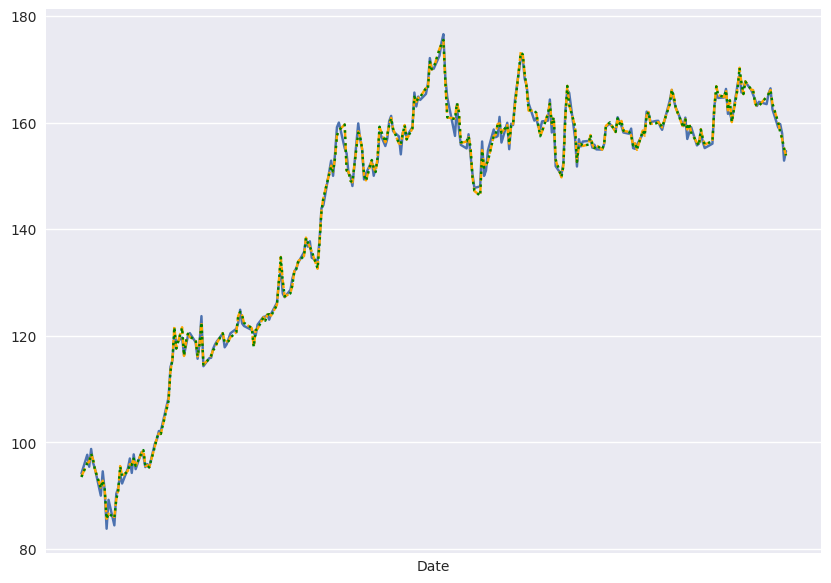

In [64]:
import matplotlib.pyplot as plt
with plt.style.context('seaborn'):
    df.tail(test_pred_df_ridge_cv.shape[0])['Close'].plot(figsize=(10,8))
    test_pred_df_lr['y_pred_LR'].plot(figsize=(10,8), color='orange', linestyle='--')
    test_pred_df_ridge_cv['y_pred_Ridge_best'].plot(figsize=(10,8), color='green', linestyle=':')
    plt.xlim('2021-01-01', '2021-03-01')
    # plt.ylim(3000, 3600)
    plt.legend()